In [3]:
import zipfile
from pathlib import Path
import requests
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
def download_url(url, save_path=Path("../downloads/data_zip_file"), chunk_size=128):
        if save_path.is_file():
            raise Exception("File already exists")
        else:
            r = requests.get(url, stream=True)
            with open(save_path, 'wb') as fd:
                for chunk in r.iter_content(chunk_size=chunk_size):
                    fd.write(chunk)

In [5]:
download_url("https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip")

In [6]:
def unzip(csv_name="hour.csv", file="./downloads/data_zip_file"):
        zf = zipfile.ZipFile(file) 
        df = pd.read_csv(zf.open(csv_name))
        return df

In [7]:
unzip()

FileNotFoundError: [Errno 2] No such file or directory: './downloads/data_zip_file'

In [70]:
class BikeRentals():
    
    def __init__(self):
        self.data_df = pd.DataFrame
        self.url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

    def download_url(self, save_path=Path("../downloads/data_zip_file.zip"), chunk_size=128):
        if save_path.is_file():
            raise Exception("File already exists")
        else:
            r = requests.get(self.url, stream=True)
            with open(save_path, 'wb') as fd:
                for chunk in r.iter_content(chunk_size=chunk_size):
                    fd.write(chunk)
    
    def unzip(self, csv_name="hour.csv", file=Path("../downloads/data_zip_file.zip")):
        zf = zipfile.ZipFile(file) 
        self.data_df = pd.read_csv(zf.open(csv_name))
        
    def correlation_matrix(self):
        df_corr = self.data_df[['mnth','hum','weathersit', 'temp', 'windspeed', 'cnt']]
        corrMatrix =  df_corr.corr()
        f, ax = plt.subplots(figsize=(12, 8))

        mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(200, 20, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(corrMatrix, mask=mask, cmap=cmap,annot = True, vmax=.3, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})

        plt.title('\nCorrelation Matrix', {'fontsize': 16})

        return plt.show()
    
    def regression(self):
        """The user chooses a week and inputs it. The function
        Builds a regression with column 'instant' in the x-axis
        and the column 'cnt' in the y-axis for the chosen week.

        Returns:
                plt.show(): returns plt graph that is a regression between
                the number of rentals and the instant in time for the
                chosen week.
        """

        pd.options.mode.chained_assignment = None

        week = 0
        
        week_exclude = [0,96,105]
        
        rentals_df = self.data_df

        rentals_df["week"] = 0

        for row in range(rentals_df.shape[0]):
            if (
                rentals_df["weekday"][row] == 6
                and rentals_df["weekday"][(row + 1)] == 0
            ):
                week += 1

            rentals_df["week"][row +1] = week
            
        for week_to_exclude in week_exclude:
            rentals_df = rentals_df[rentals_df['week']!= week_to_exclude]

        keys = list(set(list(rentals_df['week'])))

        new_values = list(range(103))

        dic_change = dict(zip(keys, new_values))


        #rentals_df = rentals_df.replace({"week": dic_change})


        week_num = int(input("Choose the week you want to see the data for:"))

        if week_num not in range(106):
            raise Exception("Please enter a number between 0 and 105 :)")

        week_df = rentals_df

        filtered_week_df = week_df[week_df["week"] == week_num]

        display_data = filtered_week_df[["instant", "cnt"]]

        plt.figure(figsize=(12, 6))

        sns.regplot(x="instant", y="cnt", data=display_data)

        plt.title(
            "\nNumber of Rentals per instant (for week {0})\n".format(week_num),
            {"fontsize": 16},
        )

        return plt.show()


In [71]:
data = BikeRentals()

In [72]:
data.download_url()

In [73]:
data.unzip()

In [74]:
df = data.data_df
df


instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

<ipython-input-39-2f62cf622dbc>:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rentals_df = rentals_df[rentals_df['week']!= week_to_exclude]


Choose the week you want to see the data for: 15


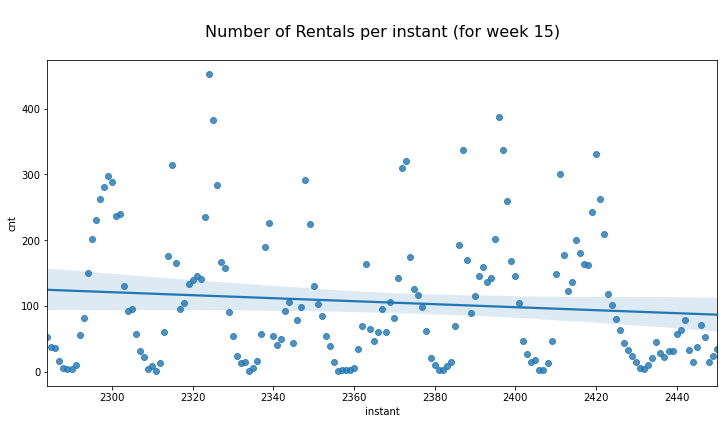

In [43]:
data.regression()

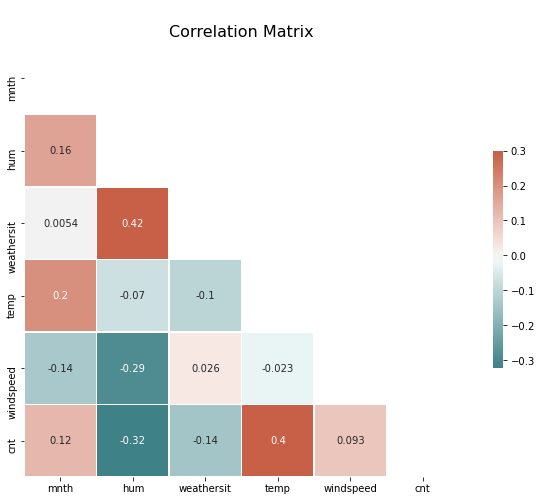

In [128]:
df_corr = data.correlation_matrix() #[['mnth','hum','weathersit', 'temp', 'windspeed', 'cnt']]

#corrMatrix = df_corr.corr()

#corrMatrix

df_corr

<ipython-input-124-5dbdd619f391>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_df['week'][row+1] = week


Choose the week you want to see the data for: 30


<ipython-input-124-5dbdd619f391>:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = df[df['week']==week_num]


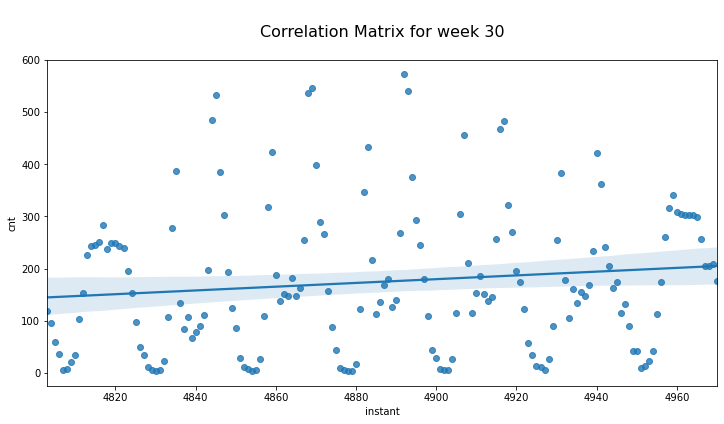

In [129]:
data.regression()

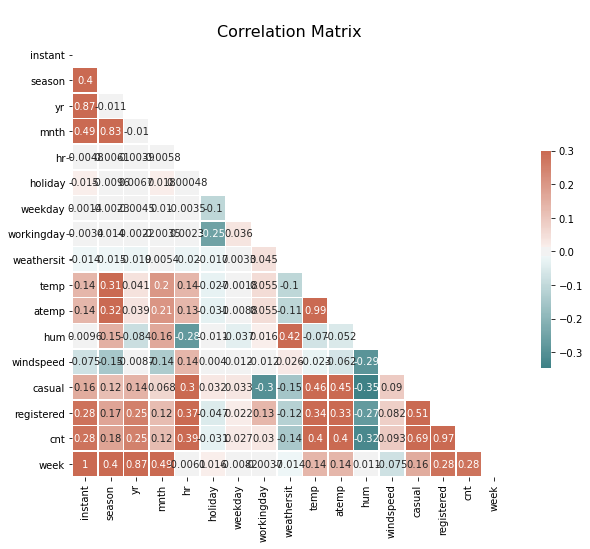

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 8))

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix, mask=mask, cmap=cmap,annot = True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('\nCorrelation Matrix', {'fontsize': 16})

plt.show()


In [30]:
#df

In [31]:
df['weekday'][25]==0

True

In [32]:
df['week'] = 0

In [33]:

week = 0

for row in range(df.shape[0]):
    if df['weekday'][row] == 6 and df['weekday'][row+1] == 0:
        #print(row, row+1, df['dteday'][row], df['dteday'][row+1], df['weekday'][row], df['weekday'][row+1])
        week += 1
    df['week'][row+1] = week
        

<ipython-input-33-05adbb900877>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'][row+1] = week


In [35]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #display(df)


In [34]:
#df

In [ ]:
df['weekday'][0] == 6

In [ ]:
df.shape[0]

Choose the week you want to see the data for: 53


<ipython-input-35-2515829ea717>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corrMatrix = df[df['week']==x].corr()


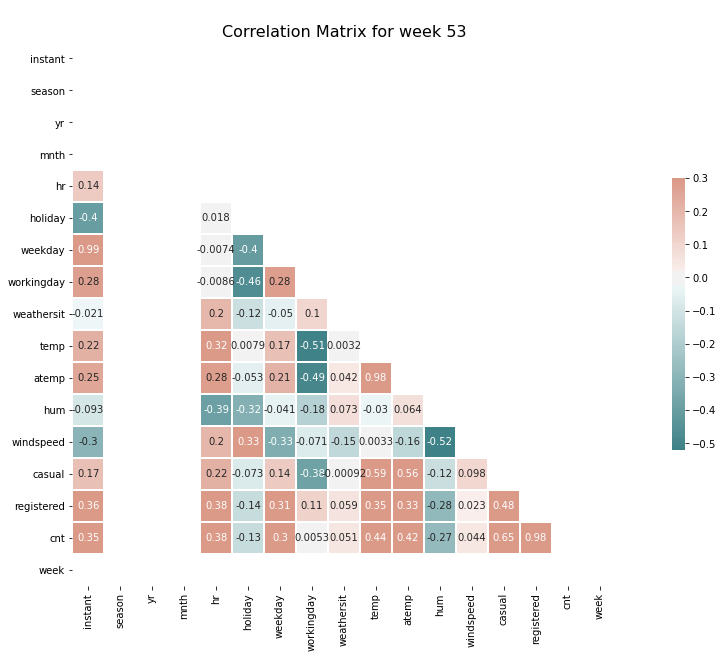

In [35]:
x = int(input('Choose the week you want to see the data for:'))

if x not in range(106):
    raise Exception("Please enter a number between 0 and 105 :)")
else:
    corrMatrix = df[df['week']==x].corr()
    f, ax = plt.subplots(figsize=(20, 10))

    mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(200, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corrMatrix, mask=mask, cmap=cmap,annot = True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('\nCorrelation Matrix for week {0}'.format(x), {'fontsize': 16})

    plt.show()

Choose the week you want to see the data for: 30


<ipython-input-91-afb62fcb7506>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data = df[df['week']==x]


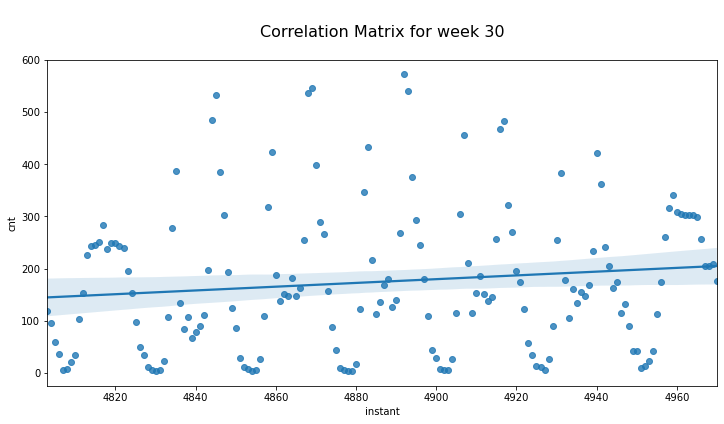

In [91]:
x = int(input('Choose the week you want to see the data for:'))

if x not in range(106):
    raise Exception("Please enter a number between 0 and 105 :)")
else:
    test_data = df[df['week']==x]

    test_data = test_data[['instant', 'cnt']]

    test_data

    fig = plt.figure(figsize = (12,6))

    sns.regplot(x="instant", y="cnt", data=test_data)

    plt.title('\nCorrelation Matrix for week {0}\n'.format(x), {'fontsize': 16})

    plt.show()
